# Model in this notebook

We solve a one-period sovereign debt model with a lender of last resort (LOLR). The state is $(b,\ell,g,\epsilon)$, where $b$ is private debt and $\ell$ is LOLR debt. The government chooses next-period private debt $b'$ (via issuance $n$) and LOLR borrowing $\ell'$ (via issuance $n_\ell$). The sovereign cannot default on the LOLR, which charges $R_\ell$ and imposes borrowing limits in repayment and default.

**Repayment value:**

$$
v^{nd}(b,\ell,g,\epsilon)=\max_{c,n,n_\ell}\left\{ \frac{c^{1-\gamma}}{1-\gamma} + \beta g^{1-\gamma} E\left[\max\{v^{nd}(b',\ell',g',\epsilon'), v^{d}(b',\ell',g',\epsilon')\} \mid g\right] \right\}
$$

$$
\begin{aligned}
&c + b + \ell = y + n + n_\ell,\quad y = g e^{\sigma\epsilon},\\
&g b' = R(n,\ell',g) n,\\
&g \ell' = R_\ell^{nd} n_\ell,\quad \ell' \le \bar{\ell}_{nd}.
\end{aligned}
$$

**Default value:**

$$
v^{d}(b,\ell,g,\epsilon)=\max_{c,n_\ell}\left\{ \frac{c^{1-\gamma}}{1-\gamma} + \beta g^{1-\gamma} E\left[\theta v^{d}(b',\ell',g',\epsilon') + (1-\theta)\max\{v^{nd}(\kappa b',\ell',g',\epsilon'), v^{d}(b',\ell',g',\epsilon')\} \mid g\right] \right\}
$$

$$
\begin{aligned}
&c + \ell = \phi(g) y + n_\ell,\quad y = g e^{\sigma\epsilon},\\
&g b' = b,\\
&g \ell' = R_\ell^{d} n_\ell,\quad \ell' \le \bar{\ell}_{d}.
\end{aligned}
$$

**Schedule and prices:**

$$
1 = \frac{R(n,\ell',g)}{1+r^*} E\left[Q(b',\ell',g',\epsilon')\mid g\right],\quad g b' = R(n,\ell',g) n.
$$

$$
Q(b,\ell,g,\epsilon) = (1-d) + d X,
$$

$$
X(b,\ell,g,\epsilon) = \frac{1}{1+r^*} E\left[(1-e)X(b',\ell'(h),g',\epsilon') + e\,\kappa Q(\kappa b',\ell'(h),g',\epsilon') \mid g\right].
$$


In [1]:
using LinearAlgebra, Statistics
include("src/structs_lolr.jl")
include("src/utils_lolr.jl")
include("src/solver_lolr.jl")
include("src/simulation_lolr.jl")

Threads.nthreads()

8

In [2]:
# Initialize model with default parameters and grids
model = init_model()


Model(500, 100, 2, 10, -0.05, 0.85, 0.0, 0.06, [-0.05, -0.04819639278557114, -0.046392785571142285, -0.04458917835671343, -0.04278557114228457, -0.04098196392785571, -0.03917835671342686, -0.037374749498997994, -0.03557114228456914, -0.033767535070140284  …  0.8337675350701402, 0.8355711422845692, 0.837374749498998, 0.8391783567134269, 0.8409819639278557, 0.8427855711422846, 0.8445891783567134, 0.8463927855711423, 0.8481963927855711, 0.85], [0.0, 0.0006060606060606061, 0.0012121212121212121, 0.0018181818181818182, 0.0024242424242424242, 0.0030303030303030303, 0.0036363636363636364, 0.004242424242424243, 0.0048484848484848485, 0.005454545454545455  …  0.05454545454545454, 0.05515151515151515, 0.055757575757575756, 0.056363636363636366, 0.05696969696969697, 0.05757575757575758, 0.05818181818181818, 0.058787878787878785, 0.059393939393939395, 0.06], [0.96, 1.04], [-2.5, -1.9444444444444444, -1.3888888888888888, -0.8333333333333334, -0.2777777777777778, 0.2777777777777778, 0.83333333333333

In [116]:
sol = solve_model(model)
mean(sol.d)


...

: 

In [37]:
# Diagnostics: iteration counts, errors, and per-iteration timing
println("Outer iterations: ", sol.outer_iters)
println("Final outer error: ", sol.outer_errs[end])

for i in 1:sol.outer_iters
    println("iter=", i,
        ", vnd_err=", sol.outer_errs[i],
        ", vd_err=", sol.vd_errs[i],
        ", x_err=", sol.x_errs[i],
        ", vd_iters=", sol.vd_iters[i],
        ", x_iters=", sol.x_iters[i],
        ", time_s=", sol.outer_times[i])
end


Outer iterations: 46
Final outer error: 8.236662014660112e-7
iter=1, vnd_err=0.6117725076335627, vd_err=2.1256192095364668e-7, x_err=5.711177257783362e-7, vd_iters=7, x_iters=8, time_s=2.782292127609253
iter=2, vnd_err=0.164843525036642, vd_err=1.2042433228387495e-7, x_err=9.855297008476427e-7, vd_iters=6, x_iters=18, time_s=2.2107291221618652
iter=3, vnd_err=0.04287219293087663, vd_err=3.4077779798025176e-7, x_err=5.451206400719499e-7, vd_iters=5, x_iters=9, time_s=2.075103998184204
iter=4, vnd_err=0.018479533741841303, vd_err=2.0932645661275728e-7, x_err=3.8471456809130444e-7, vd_iters=5, x_iters=7, time_s=1.9023549556732178
iter=5, vnd_err=0.005292026502270453, vd_err=9.647250740485447e-7, x_err=1.7288224152256504e-7, vd_iters=5, x_iters=6, time_s=1.829383134841919
iter=6, vnd_err=0.0035841124713935635, vd_err=4.563267426149764e-7, x_err=7.422733186990271e-7, vd_iters=7, x_iters=10, time_s=1.935227870941162
iter=7, vnd_err=0.006285770365007881, vd_err=8.807651452613641e-7, x_err=8.6

In [78]:
sol = solve_model(model; sol = sol)    # reuse vnd/vd if non-empty
mean(sol.d)

0.2161

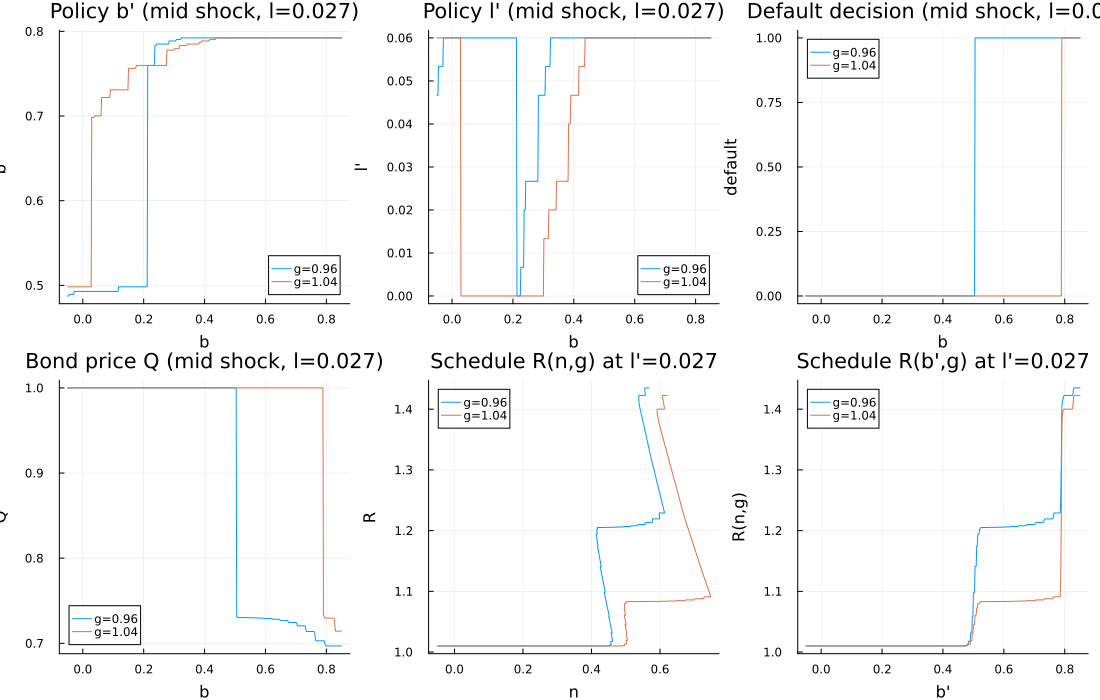

In [38]:
using Plots
b = model.b
l = model.l
g = model.g
eps = model.eps

e_idx = Int(cld(model.Ne, 2))
l_idx = Int(cld(model.Nl, 2))
lp_idx = l_idx

l_val = round(l[l_idx], digits = 3)
lp_val = round(l[lp_idx], digits = 3)

p1 = plot(title = "Policy b' (mid shock, l=$(l_val))", xlabel = "b", ylabel = "b'")
p2 = plot(title = "Policy l' (mid shock, l=$(l_val))", xlabel = "b", ylabel = "l'")
p3 = plot(title = "Default decision (mid shock, l=$(l_val))", xlabel = "b", ylabel = "default")
p4 = plot(title = "Bond price Q (mid shock, l=$(l_val))", xlabel = "b", ylabel = "Q")
p5 = plot(title = "Schedule R(n,g) at l'=$(lp_val)", xlabel = "n", ylabel = "R")
p6 = plot(title = "Schedule R(b',g) at l'=$(lp_val)", xlabel = "b'", ylabel = "R(n,g)")

for gi in 1:model.Ng
    bprime_policy = b[sol.b_policy_idx[:, l_idx, gi, e_idx]]
    lprime_policy = l[sol.l_policy_idx[:, l_idx, gi, e_idx]]
    plot!(p1, b, bprime_policy, label = "g=$(g[gi])")
    plot!(p2, b, lprime_policy, label = "g=$(g[gi])")
    plot!(p3, b, Float64.(sol.d[:, l_idx, gi, e_idx]), label = "g=$(g[gi])")
    plot!(p4, b, sol.Q[:, l_idx, gi, e_idx], label = "g=$(g[gi])")
    plot!(p5, sol.n[:, lp_idx, gi], sol.R[:, lp_idx, gi], label = "g=$(g[gi])")
    plot!(p6, b, sol.R[:, lp_idx, gi], label = "g=$(g[gi])")
end
plot(p1, p2, p3, p4, p5, p6, layout = (2, 3), size = (1100, 700))


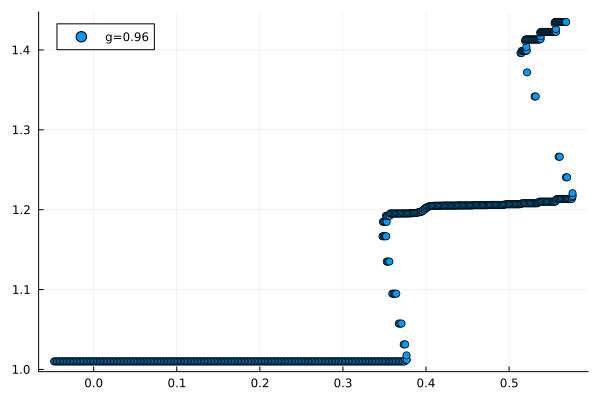

In [32]:
gi = 1
li = 1
st = 1 #1550
en = 500
plot(sol.n[st:en, li, gi], sol.R[st:en, li, gi], label = "g=$(g[gi])", seriestype=:scatter)

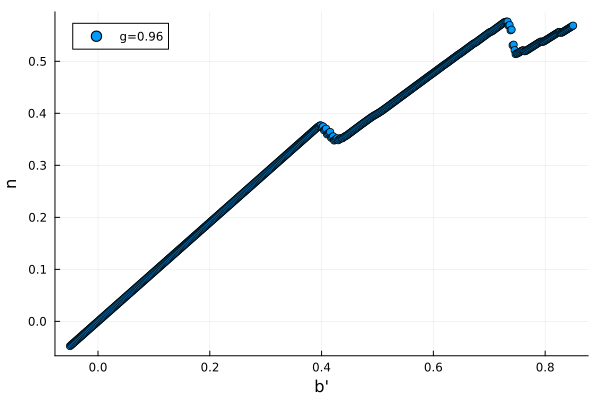

In [33]:
st = 1 #1550
en = 500
plot(b[st:en],sol.n[st:en, li, gi] , label="g=0.96", xlabel="b'", ylabel="n", seriestype=:scatter)


In [69]:
# Simulation
b0_idx = 1  # pick a savings grid point by index
sim = simulate(model, sol; T = 200_000, b0_idx = b0_idx, seed = 1234)


(b = [-0.05, 0.4934811603867956, 0.7935811937312437, 0.6201233744581527, 0.7935811937312437, 0.7935811937312437, 0.7935811937312437, 0.6201233744581527, 0.7935811937312437, 0.7935811937312437  …  0.85, 0.85, 0.85, 0.6639379793264422, 0.7935811937312437, 0.7935811937312437, 0.7935811937312437, 0.7935811937312437, 0.7935811937312437, 0.7935811937312437], y = [0.96, 0.9738996644863737, 0.9456, 1.0626685166576872, 1.025156940090484, 1.047501927757008, 0.912220873540593, 1.047501927757008, 1.047501927757008, 0.9662109128379893  …  0.9456, 0.912220873540593, 0.9802005039958236, 1.025156940090484, 1.032551799036786, 1.032551799036786, 1.032551799036786, 1.0105257228996967, 1.025156940090484, 1.0626685166576872], n = [0.46905139997160766, 0.6196335777754153, 0.0, 0.7563682443984974, 0.7563682443984974, 0.7563682443984974, 0.0, 0.7563682443984974, 0.7563682443984974, 0.0  …  0.0, 0.0, 0.0, 0.7563682443984974, 0.7563682443984974, 0.7563682443984974, 0.7563682443984974, 0.7563682443984974, 0.7563

In [70]:
# Moments
stats = summarize_simulation(sim, model; burnin = 10_000, nbins = 1000)

println("Default rate (episodes / periods): ", stats.default_rate)
println("Mean debt-to-GDP: ", stats.mean_b_to_gdp)
println("Mean issuance-to-GDP: ", stats.mean_n_to_gdp)
println("Mean credit spread (non-default): ", stats.mean_credit_spread, " (N=", stats.credit_spread_obs, ")")
println("Share at b_min: ", stats.share_b_min, ", share at b_max: ", stats.share_b_max)

stats.hist_edges
stats.hist_counts


Default rate (episodes / periods): 0.1503263157894737
Mean debt-to-GDP: 0.7834406600278254
Mean issuance-to-GDP: 0.43458135986736546
Mean credit spread (non-default): 0.08143067069843073 (N=113533)
Share at b_min: 0.0, share at b_max: 0.15014210526315788


1000-element Vector{Int64}:
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     ⋮
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
 28527

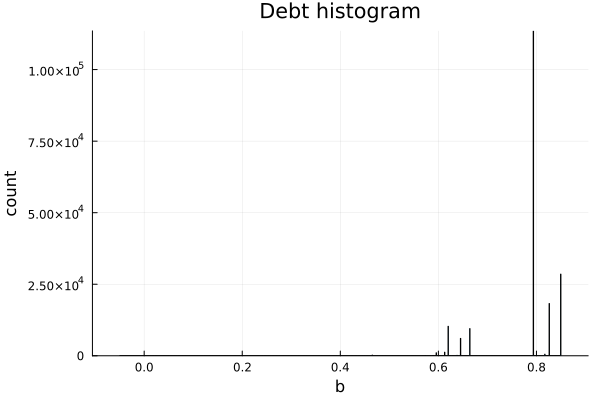

In [71]:
# Histogram of debt (b)
edges = stats.hist_edges
counts = stats.hist_counts
mid = 0.5 .* (edges[1:end-1] .+ edges[2:end])
bar(mid, counts; xlabel = "b", ylabel = "count", legend = false, title = "Debt histogram")


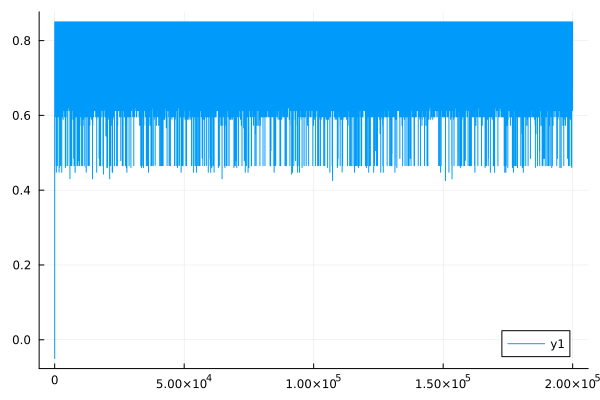

In [73]:
plot(sim.b)

In [87]:
fmtbytes(x) = Base.format_bytes(x)
allocs(t) = t.gcstats.malloc + t.gcstats.realloc + t.gcstats.poolalloc + t.gcstats.bigalloc

# --- setup (mirrors solve_model) ---
model = init_model()

b = model.b
l = model.l
g = model.g
eps = model.eps

Nb, Nl, Ng, Ne = model.Nb, model.Nl, model.Ng, model.Ne

y = reshape(g, Ng, 1) .* exp.(model.sigma_eps .* reshape(eps, 1, Ne))
g_beta = model.beta .* (g .^ (1 - model.gamma))

bprime = b ./ reshape(g, 1, Ng)
bprime_idx = nearest_index(b, bprime)
kbprime_idx = nearest_index(b, model.kappa .* bprime)
b0_idx = findmin(abs.(b))[2]
l0_idx = findmin(abs.(l))[2]

base = u(y, model.gamma) ./ (1 - model.beta)
vnd = repeat(reshape(base, 1, 1, Ng, Ne), Nb, Nl, 1, 1)
vd = copy(vnd .- 1.0)
X = ones(Float64, Nb, Nl, Ng, Ne)

d = falses(Nb, Nl, Ng, Ne)
e = trues(Nb, Nl, Ng, Ne)

println("---- timings (first run includes compilation) ----")

t = @timed _solve_vd!(vd, vnd, model, y, g_beta, bprime_idx, kbprime_idx, l, l0_idx)
(err_vd, it_vd, l_policy_idx_d) = t.value
println("solve_vd!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")

d = vnd .< vd
e = .!d

t = @timed _solve_prices!(X, d, e, model, bprime_idx, kbprime_idx, l_policy_idx_d)
(Q, err_x, it_x) = t.value
println("solve_prices!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")

t = @timed _compute_schedule(b, l, g, model, Q, d)
(QE, R, n, pdefault) = t.value
println("compute_schedule!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")

t = @timed _update_vnd!(vnd, vd, model, b, l, y, g_beta, n, pdefault, b0_idx, l0_idx)
err_update = t.value
println("update_vnd!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")

t = @timed _compute_policy_idx(model, b, l, y, g_beta, n, pdefault, vnd, vd, b0_idx, l0_idx)
(bpol, lpol) = t.value
println("compute_policy_idx!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")


---- timings (first run includes compilation) ----
solve_vd!: time=0.015837291s, allocs=2757, bytes=13.118 MiB
solve_prices!: time=0.062819458s, allocs=748, bytes=31.425 MiB
compute_schedule!: time=0.000198708s, allocs=33, bytes=1.230 MiB
update_vnd!: time=0.376279209s, allocs=1191, bytes=2.996 MiB
compute_policy_idx!: time=0.445139667s, allocs=1184, bytes=2.995 MiB


In [6]:
fmtbytes(x) = Base.format_bytes(x)
allocs(t) = t.gcstats.malloc + t.gcstats.realloc + t.gcstats.poolalloc + t.gcstats.bigalloc

# --- setup (mirrors solve_model) ---
model = init_model()

b = model.b
l = model.l
g = model.g
eps = model.eps

Nb, Nl, Ng, Ne = model.Nb, model.Nl, model.Ng, model.Ne

y = reshape(g, Ng, 1) .* exp.(model.sigma_eps .* reshape(eps, 1, Ne))
g_beta = model.beta .* (g .^ (1 - model.gamma))

bprime = b ./ reshape(g, 1, Ng)
bprime_idx = nearest_index(b, bprime)
kbprime_idx = nearest_index(b, model.kappa .* bprime)
b0_idx = findmin(abs.(b))[2]
l0_idx = findmin(abs.(l))[2]

base = u.(y, [model.gamma]) ./ (1 - model.beta)
vnd = repeat(reshape(base, 1, 1, Ng, Ne), Nb, Nl, 1, 1)
vd = copy(vnd .- 1.0)
X = ones(Float64, Nb, Nl, Ng, Ne)

d = falses(Nb, Nl, Ng, Ne)
e = trues(Nb, Nl, Ng, Ne)

println("---- timings (first run includes compilation) ----")

t = @timed _solve_vd!(vd, vnd, model, y, g_beta, bprime_idx, kbprime_idx, l, l0_idx)
(err_vd, it_vd, l_policy_idx_d) = t.value
println("solve_vd!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")

d = vnd .< vd
e = .!d

t = @timed _solve_prices!(X, d, e, model, bprime_idx, kbprime_idx, l_policy_idx_d)
(Q, err_x, it_x) = t.value
println("solve_prices!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")

t = @timed _compute_schedule(b, l, g, model, Q, d)
(QE, R, n, pdefault) = t.value
println("compute_schedule!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")

t = @timed _update_vnd!(vnd, vd, model, b, l, y, g_beta, n, pdefault, b0_idx, l0_idx)
err_update = t.value
println("update_vnd!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")

t = @timed _compute_policy_idx(model, b, l, y, g_beta, n, pdefault, vnd, vd, b0_idx, l0_idx)
(bpol, lpol) = t.value
println("compute_policy_idx!: time=$(t.time)s, allocs=$(allocs(t)), bytes=$(fmtbytes(t.bytes))")


---- timings (first run includes compilation) ----
solve_vd!: time=0.192065541s, allocs=20587, bytes=137.752 MiB
solve_prices!: time=0.585958083s, allocs=748, bytes=312.949 MiB
compute_schedule!: time=0.00182425s, allocs=33, bytes=12.216 MiB
update_vnd!: time=27.150070959s, allocs=295, bytes=28.278 MiB
compute_policy_idx!: time=28.933676125s, allocs=317, bytes=28.279 MiB
